In [1]:
###Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#let's create numpy arrays gotfor features and target
X = df.drop("Outcome", axis = 1).values

y = df["Outcome"].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state = 42 ,stratify = y)

In [11]:
#Import K-NeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i , K  in enumerate(neighbors):
    # Setup a knn classifiers with K neighbors
    knn = KNeighborsClassifier(n_neighbors = K)
    
    # Fit the model
    knn.fit(X_train , y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train , y_train)
    
    test_accuracy[i] = knn.score(X_test , y_test)

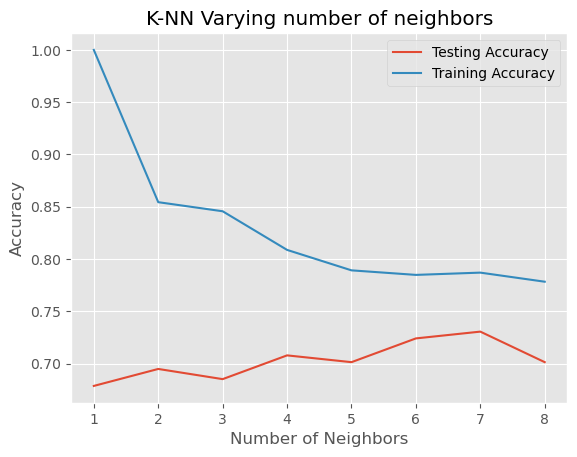

In [12]:
# Generate plot
plt.title("K-NN Varying number of neighbors")
plt.plot(neighbors, test_accuracy , label = "Testing Accuracy")
plt.plot(neighbors , train_accuracy , label = "Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [13]:
#Setup a Knn classifier with K neighbors
knn = KNeighborsClassifier(n_neighbors = 7)

In [14]:
#Fit the model

knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [15]:
knn.score(X_test , y_test)

0.7305194805194806

In [16]:
#Import confusion matrix

from sklearn.metrics import confusion_matrix , roc_curve

In [17]:
# Let us get the perdiction using the classifier we had fit above

y_pred = knn.predict(X_test)

In [18]:
confusion_matrix(y_test,y_pred )

array([[165,  36],
       [ 47,  60]], dtype=int64)

In [19]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [20]:
fpr , tpr, thresholds = roc_curve(y_test, y_pred_proba)

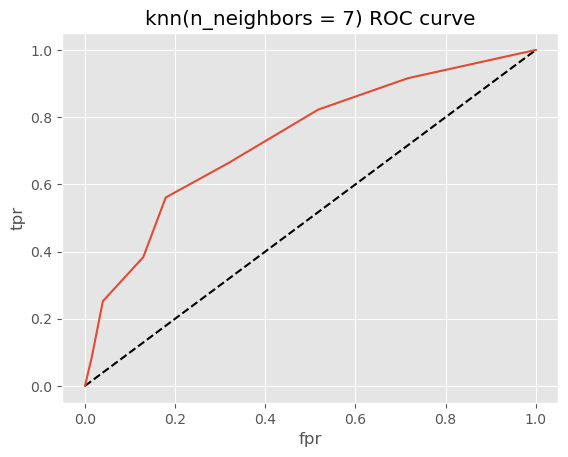

In [21]:
plt.plot([0,1], "k--")
plt.plot(fpr  , tpr , label = "knn")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("knn(n_neighbors = 7) ROC curve")
plt.show()

In [22]:
#Area under ROC Curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_pred_proba)

0.7345050448691124

In [23]:
#import GridSearchCV

from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {"n_neighbors": np.arange(1,50)}

In [25]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn , param_grid, cv = 5)
knn_cv.fit(X, y)                                                                                                                                                       

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
knn_cv.best_score_

0.7578558696205755

In [27]:
knn_cv.best_params_

{'n_neighbors': 14}